In [61]:
import yfinance as yf
import datetime as dt
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

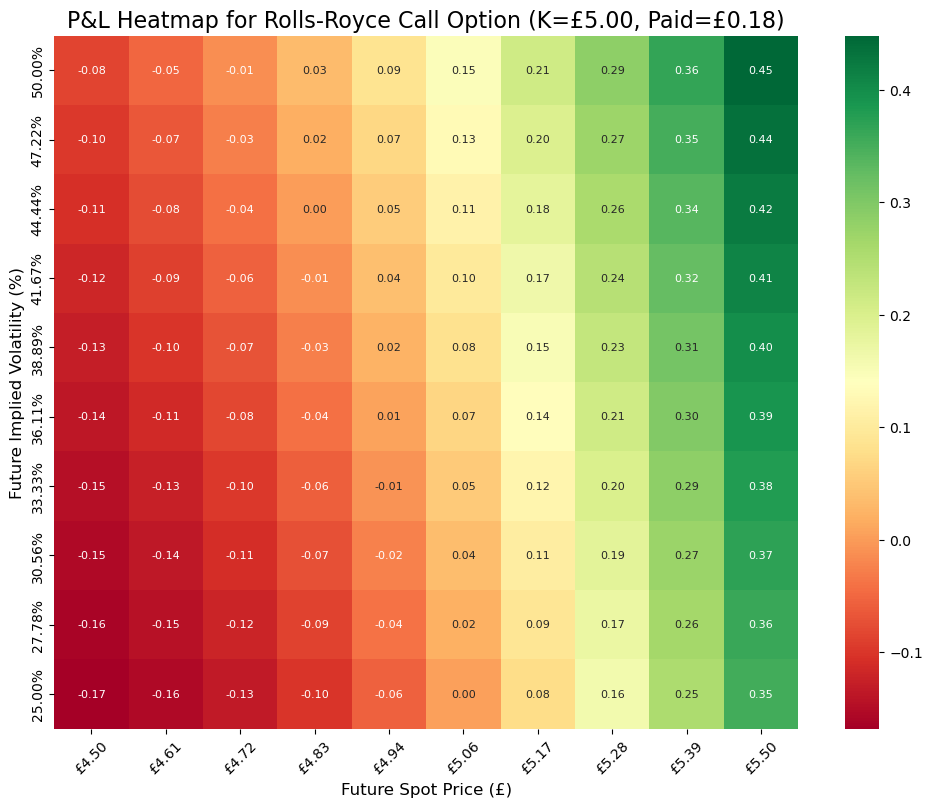

In [93]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# 1. BLACK-SCHOLES FUNCTION
def black_scholes_with_greeks(S, K, T, r, sigma, option_type='call'):
    """Calculates the Black-Scholes option price."""
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("option_type must be 'call' or 'put'")
    
    return {
        'Price': price,
    }

# 2. P&L HEATMAP GENERATION
# --- Rolls-Royce (RR.L) Example Trade ---
# Scenario: Buying a call option 30 days before an earnings report.
K = 5.00                   # Strike price (£5.00)
T = 30 / 365               # Time to maturity (30 days)
r = 0.0475                 # Risk-free rate (UK base rate, e.g., 4.75%)
option_type = 'call'       # We are bullish on the earnings outcome
purchase_price = 0.18      # The premium paid for the option (£0.18)

# --- Scenario Grid for the Heatmap ---
# Future stock prices around the current price of ~£4.75
spot_prices = np.linspace(4.50, 5.50, 10)
# Future volatilities, expecting a rise due to earnings
volatilities = np.linspace(0.25, 0.50, 10)

# --- Calculate P&L for each point on the grid ---
pnl_matrix = np.zeros((len(volatilities), len(spot_prices)))

for i, vol in enumerate(volatilities):
    for j, spot in enumerate(spot_prices):
        # Call your function to get the price for the current scenario
        results = black_scholes_with_greeks(spot, K, T, r, vol, option_type)
        current_price = results['Price']
        
        # Calculate P&L and store it in the matrix
        pnl = current_price - purchase_price
        pnl_matrix[i, j] = pnl

# --- Visualize the Heatmap ---
plt.figure(figsize=(12, 9))
sns.heatmap(
    pnl_matrix,
    xticklabels=[f"£{s:.2f}" for s in spot_prices],
    yticklabels=[f"{v:.2%}" for v in volatilities], 
    annot=True,
    cmap='RdYlGn',
    fmt=".2f",
    annot_kws={"size": 8}
)

plt.gca().invert_yaxis()
plt.title(f'P&L Heatmap for Rolls-Royce Call Option (K=£{K:.2f}, Paid=£{purchase_price:.2f})', fontsize=16)
plt.xlabel('Future Spot Price (£)', fontsize=12)
plt.ylabel('Future Implied Volatility (%)', fontsize=12)
plt.xticks(rotation=45)
plt.show()